<a href="https://colab.research.google.com/github/Smjfirna/Arsitektur-Compration/blob/main/Eksperimen_Sample/MobileNet/80%3A20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras.applications import ResNet50

In [3]:
base_dir = '/content/drive/MyDrive/Skripsi Syafirna/Program/Data Sample 10'

print("Contents of base directory:")
print(os.listdir(base_dir))

Contents of base directory:
['Common_rust', 'Blight', 'Healthy', 'Gray_leaf_spot']


In [4]:
Common_rust_dir = os.path.join(base_dir, 'Common_rust')
Blight_dir = os.path.join(base_dir, 'Blight')
Healthy_dir = os.path.join(base_dir, 'Healthy')
Gray_leaf_spot_dir = os.path.join(base_dir, 'Gray_leaf_spot')

In [5]:
Common_rust_fnames = os.listdir(Common_rust_dir)
Blight_fnames = os.listdir(Blight_dir)
Healthy_fnames = os.listdir(Healthy_dir)
Gray_leaf_spot_fnames = os.listdir(Gray_leaf_spot_dir)

In [6]:
print('Total Gambar Common rust :', len(os.listdir(Common_rust_dir)))
print('Total Gambar Blight :', len(os.listdir(Blight_dir)))
print('Total Gambar Healty :', len(os.listdir(Healthy_dir)))
print('Total Gambar Gray Leaf Spot :', len(os.listdir(Gray_leaf_spot_dir)))

Total Gambar Common rust : 130
Total Gambar Blight : 114
Total Gambar Healty : 116
Total Gambar Gray Leaf Spot : 57


In [36]:
img_height = 224
img_width = 224
img_channels = 3
num_epochs= 10

datagen = ImageDataGenerator( rescale = 1.0/255.,
                              validation_split=0.3,
                              horizontal_flip=True,
                              vertical_flip=True,
                              rotation_range=20,
                              brightness_range=[0.5, 1.5]
                            )

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='validation'
)

Found 293 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


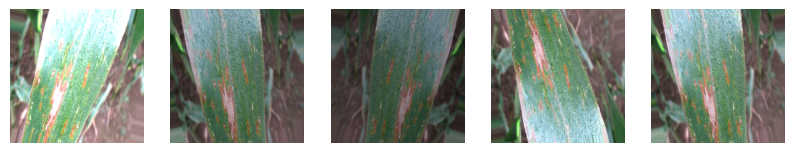

In [37]:
import matplotlib.pyplot as plt

# Ambil beberapa sampel gambar dari generator
augmented_images = [train_generator[0][0][0] for i in range(5)]

# Tampilkan gambar-gambar yang telah di-augmentasi
plt.figure(figsize=(10, 10))
for i in range(len(augmented_images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()

In [38]:
# Initialize ResNet50 base model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))

# Freeze the convolutional base
for layer in resnet50_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(resnet50_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
10/10 [==============================] - 20s 1s/step - loss: 16.6120 - accuracy: 0.3003 - val_loss: 13.2979 - val_accuracy: 0.3145
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 6.1076 - accuracy: 0.3208 - val_loss: 4.9705 - val_accuracy: 0.3145
Epoch 3/10
10/10 [==============================] - 11s 966ms/step - loss: 2.3825 - accuracy: 0.3379 - val_loss: 1.8905 - val_accuracy: 0.4839
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 1.7354 - accuracy: 0.3993 - val_loss: 1.4463 - val_accuracy: 0.5242
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 1.5903 - accuracy: 0.4676 - val_loss: 1.6676 - val_accuracy: 0.3952
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 1.5007 - accuracy: 0.4232 - val_loss: 1.2712 - val_accuracy: 0.5161
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 1.6449 - accuracy: 0.4061 - val_loss: 1.2002 - val_accuracy: 0.5565
Epoch 8/10
10/1

4/4 [==============================] - 3s 572ms/step


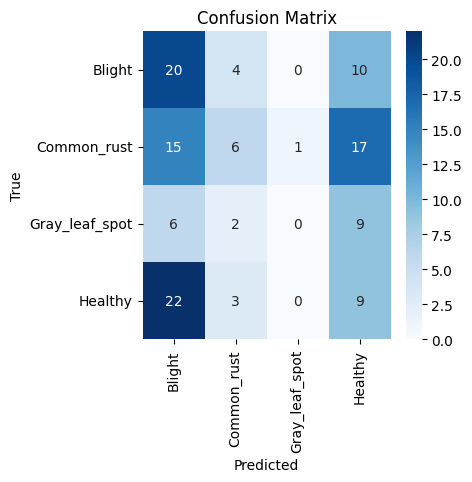


Classification Report:
                 precision    recall  f1-score   support

        Blight       0.32      0.59      0.41        34
   Common_rust       0.40      0.15      0.22        39
Gray_leaf_spot       0.00      0.00      0.00        17
       Healthy       0.20      0.26      0.23        34

      accuracy                           0.28       124
     macro avg       0.23      0.25      0.22       124
  weighted avg       0.27      0.28      0.25       124



In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))